<a href="https://colab.research.google.com/github/MiguelGmz7/Inmersion1_Preprocess/blob/main/Inmersion_1_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inmersion de datos con python CLASE 1


Importamos las librerias, para despues conectar nuestro notebook con el drive

In [ ]:
# prompt: importa los siguientes modulos con sus respectivos alias: pandas, mathplotlib, seaborn, drive y warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

drive.mount('/content/Drive')
warnings.filterwarnings('ignore')


Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


Configuramos la opcion de columnas con el **max_columns** que mostrara **TODAS** las columnas del **CSV**

In [ ]:
pd.set_option('display.max_columns',None)
global df_banco, resultados

leemos entonces el csv, y lo almacenamos en una variable (dataframe), despues mostramos la cabeza del dataframe

In [ ]:
df_banco = pd.read_csv('/content/Drive/MyDrive/inmersion/resources/german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


## Identificar atributos del dataframe

### Shape

Con este atributo mostramos cuantos (registros, atributos) tenemos o (renglones, columnas)

In [ ]:
df_banco.shape

(1000, 21)

### columns

Nos da un indice de las columnas

In [ ]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

### info()

Es un metodo que nos mostrara mas información de todas las columnas

In [ ]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

**¿Qué nos muestra esto?**

| # | Column | Non-Null Count | Dtype |
| - | ------ | -------------- | ----- |
| Numeoro de columna | Nombre de la columna | Cuantos registros tiene y si tenemos algun registro vacio (non-null -> no esta nulo) | Que tipo de variable es el atributo |

---

## Revisar que columnas usan objetos

primero hacemos una variable llamada **columns**, esta sera una lista de todas las columnas que ya entraron previamente en el filtro de

*select_dtypes(include=['object'])*

este comando selecciona todo (columnas y renglones) que sean de tipo **object**


In [ ]:
columns = list(df_banco.select_dtypes(include=['object']).columns)
columns

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

---

## Mostrar todos los posibles valores de account_check_status

Como ahora df_banco es un dataframe podemos acceder a sus columnas, como si se trataran de **ATRIBUTOS DE UNA CLASE**, por eso nos permite usar el metodo

```python
value_counts()
```

para mostrar todos los diferentes valores que puede tener este atributo y un contador de cuantas veces se repite

In [ ]:
df_banco.account_check_status.value_counts()

account_check_status
no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: count, dtype: int64

## Crear un listado de columnas con sus posibles valores

Vamos a explicar como funciona la 4ta linea de codigo:

Si la pasada linea la usabamos para mostrar los posibles valores y un contador.
<br></br>



ahora lo unico que mandaremos sera un indice (las primera columna, sin el contador)
<br></br>


pero como estamos dentro de un for, nuestro output tiene que ser entonces mas dinamico, por eso usamos


```python
df_banco[f'{column}']
```

esto nos permitira iterar entre cada atributo puesto que con los dataframe, podemos llamar a un atributo usando por ejemplo: **df_banco['age']** esto nos traera toda la columna de age
<br></br>

pero ahora que le pusimos el f-string podemos cambiar el interior del corchete con los diferentes nombres de las columnas

In [ ]:

for column in columns:
    print(f"Nombre de la columna: {column}")
    print(list(df_banco[f'{column}'].value_counts().index))
    print("\n")

Nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


Nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


Nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


Nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


Nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


Nombre de la columna: personal_status_sex
['male : single', 'female : divorced/separ

---
## Modificar los valores de un atributo

primero creamos un diccionario, donde la key *yes* nos de 1 y *no* nos de 0

In [ ]:
# dic = {'yes': 1, 'no': 0}

ahora usamos el metodo **map** para modificar toda nuestra columna, usando como ejemplo el diccionario que acabamos de crear

In [ ]:
# df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)

In [ ]:
# df_banco['foreign_worker']

---
## Transformar los datos

ahora mismo nuestros datos, son objectos y enteros, no tenemos homogeinidad, es por eso que vamos a transformar todos nuestros objetos para que se conviertan en enteros
<br></br>

para esto entonces crearemos una funcion que haga:

- Eliminar los duplicados si existe alguno
- Eliminar los valores faltantes, si existe alguno
- mapear cada uno de los registros cuya variable era de *objeto* y ponderla como si fuera opcion multiple

In [ ]:
def process_data():
  global df_banco

  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco

  # Elimina los duplicados si existen duplicados, de lo contrario no cambies nada

  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  # elimina valores faltantes si algun valor del dataframe es nulo, de lo contrario no cambies nada


  # ----------------------------------------------------------
  # Desde aquí en adelante empezaremos a ponderar cada variable
  # -----------------------------------------------------------

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [ ]:
process_data()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
373,0,4,60,5,1,13756,1,1,2,3,1,4,4,63,1,3,1,4,1,1,1
899,1,1,18,3,4,4153,5,3,2,3,2,3,3,42,3,2,1,3,1,0,1
799,0,2,9,3,1,1549,1,4,4,3,1,2,1,35,3,2,1,1,1,0,1


---
## Agrupacion de las variables de masulino o femenino

Nos dimos cuenta despues que las variables de *personal_status_sex* es muy abvigua, por que tenemos entonces muchas categorias:

```python
 a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
```

de estas solo las vamos a dividir en masculino y femenino

In [ ]:
dic_sexo = {2:1,5:1,1:0,3:0,4:0}

## Featuring engineering

In [ ]:
df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)

Esto que acabamos de hacer se le llama Featuring engineering, esto es seleccionar datos, y cambiarlos para que en un futuro puedan ser mas utiles

In [ ]:
def feature_engineering():
  global df_banco

  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)

  # Podemos automatizar este proceso de divir, 1 atributo en dos usando el metodo de pandas *CUT*

  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins = [18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5,6]).astype(int)

  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

---

### Funcionamiento de cut

1-. Selecionamos el atributo que vamos a cortar

2-. marcamos los puntos por los que se va a cortar la informacion 18 - 30, ese es el primer grupo

3-. marcamos los grupos con las labels

---

In [ ]:
feature_engineering()

In [ ]:
df_banco.tail(3)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
997,0,4,3,5,5,1,4,1,4,3,3,2,1,3,1,0,1,0,1,2,1,1
998,1,1,3,5,5,3,4,1,4,4,3,3,1,3,1,1,1,0,1,1,4,2
999,0,2,5,2,4,5,3,1,4,3,3,2,1,3,1,0,1,0,1,1,4,5


In [ ]:
df_banco.head(4)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8


## Obtener mas información de los atributos

In [ ]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


---

## Creacion de un histograma

Ahora usaremos methploit para crear un histograma de los sexos que tenemos en el dataframe

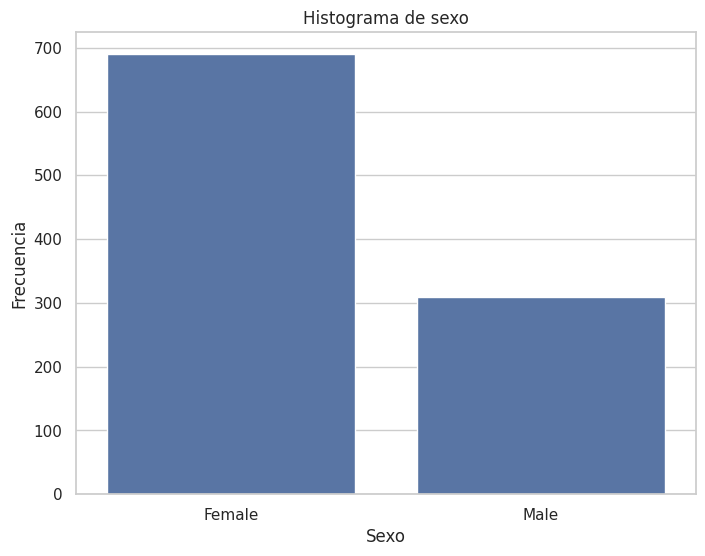

In [ ]:
sns.set(style="whitegrid")

# crear el histograma utilizando seaborn
plt.figure(figsize=(8,6))
sns.countplot(data=df_banco, x='sexo')
plt.title('Histograma de sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Cambiar los etiquetas de 0 y 1
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# mostrar el histograma
plt.show()

## Creacion de multiples histogramas

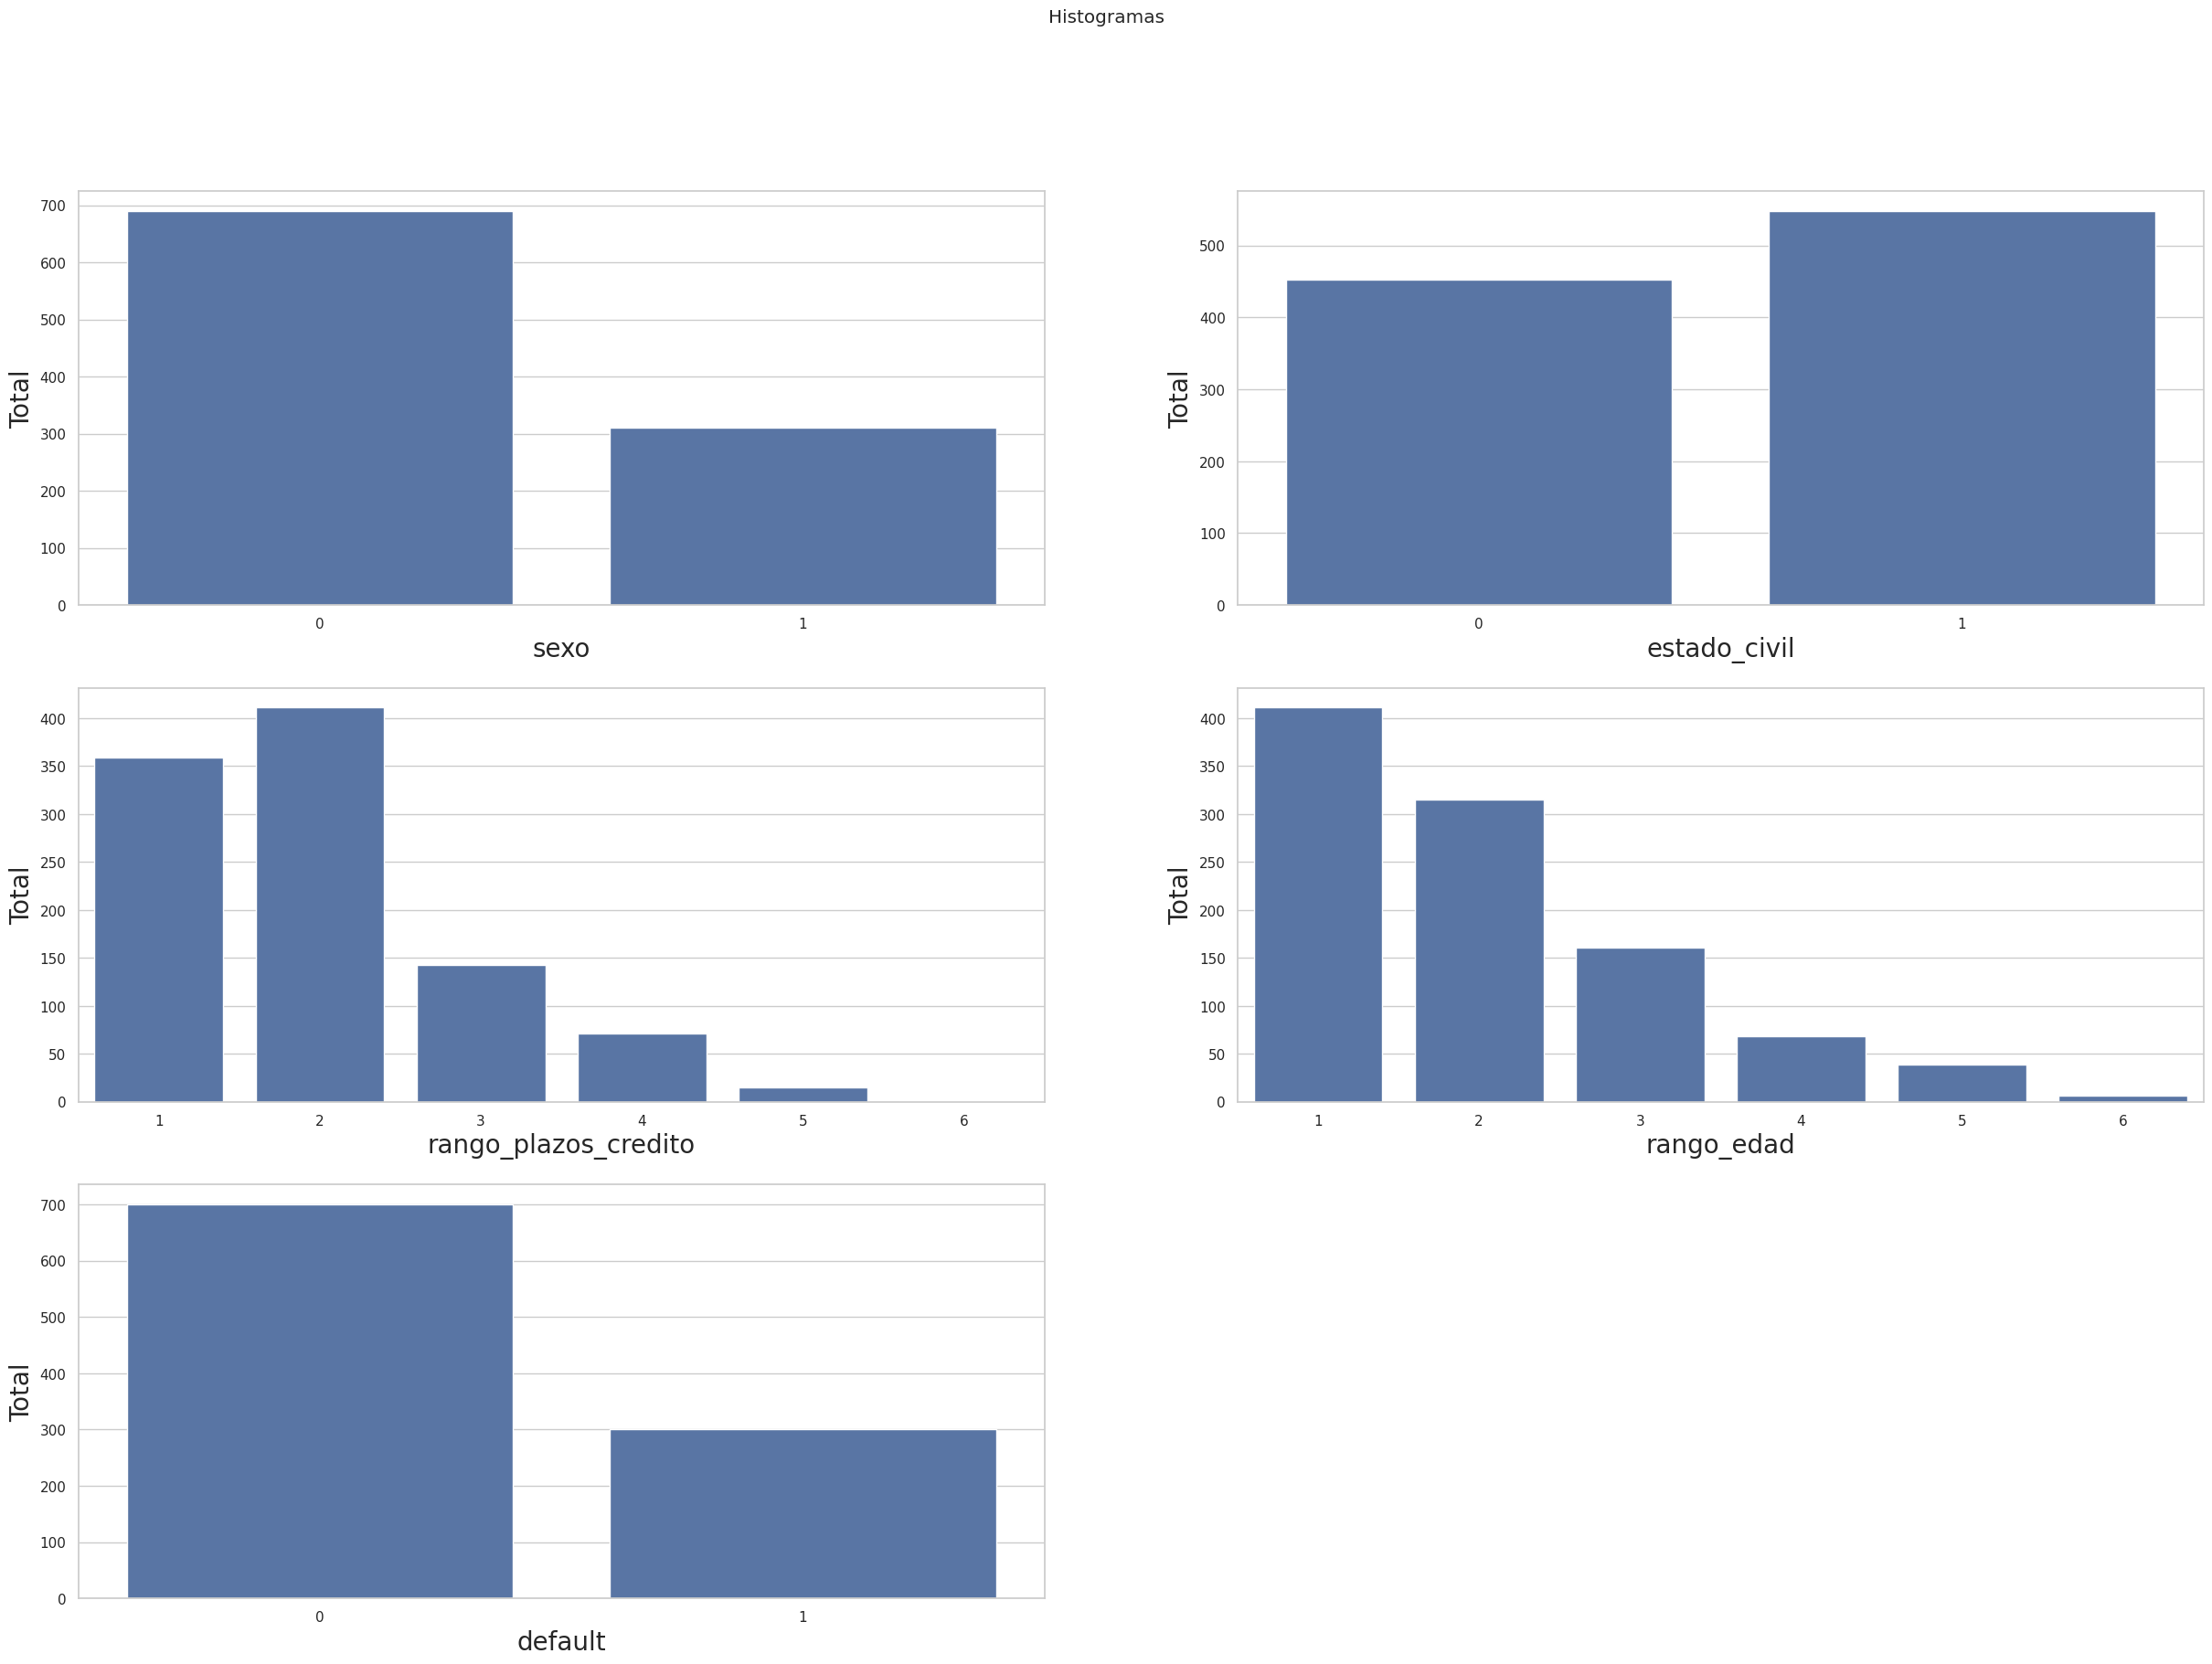

In [ ]:
def analisis_exp():
  global df_banco

  histogramas = ['sexo', 'estado_civil', 'rango_plazos_credito', 'rango_edad', 'default']

  lista_histogramas = list(enumerate(histogramas))

  #Creacion de los histogramas

  plt.figure(figsize=(30,20))


  plt.suptitle('Histogramas')

  for index, variable in lista_histogramas:
    plt.subplot(3, 2, index + 1) # creamos la grid del subplot en 3 lineas y 2 culumnas, así esta organizado abajo


    sns.countplot(x = variable, data=df_banco) # de donde sacamos la informacion (nombre de la tabla, y dataframe)


    plt.xlabel(variable, fontsize=20) #
    plt.ylabel('Total', fontsize=20)

    # Adjusting layout to avoid overlap
    #plt.tight_layout()

    # Displaying the plot
    #plt.show()

# Example usage
# Call the function to execute the EDA and plot the histograms
analisis_exp()



---
# DESAFIOS
1- Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.

2- Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.
Crear una conclusión para cada uno de los gráficos del histograma.

3- Mirar los datos y extraer conclusiones, porque es una habilidad esencial.

<br>

## 2 - Creacion de un mapa de calor
Un mapa de calor nos ayuda a medir la coorrelacion que existe entre 2 variables, esto nos quiere decir que tanto depende una de la otra en los ensayos que ya hemos hecho


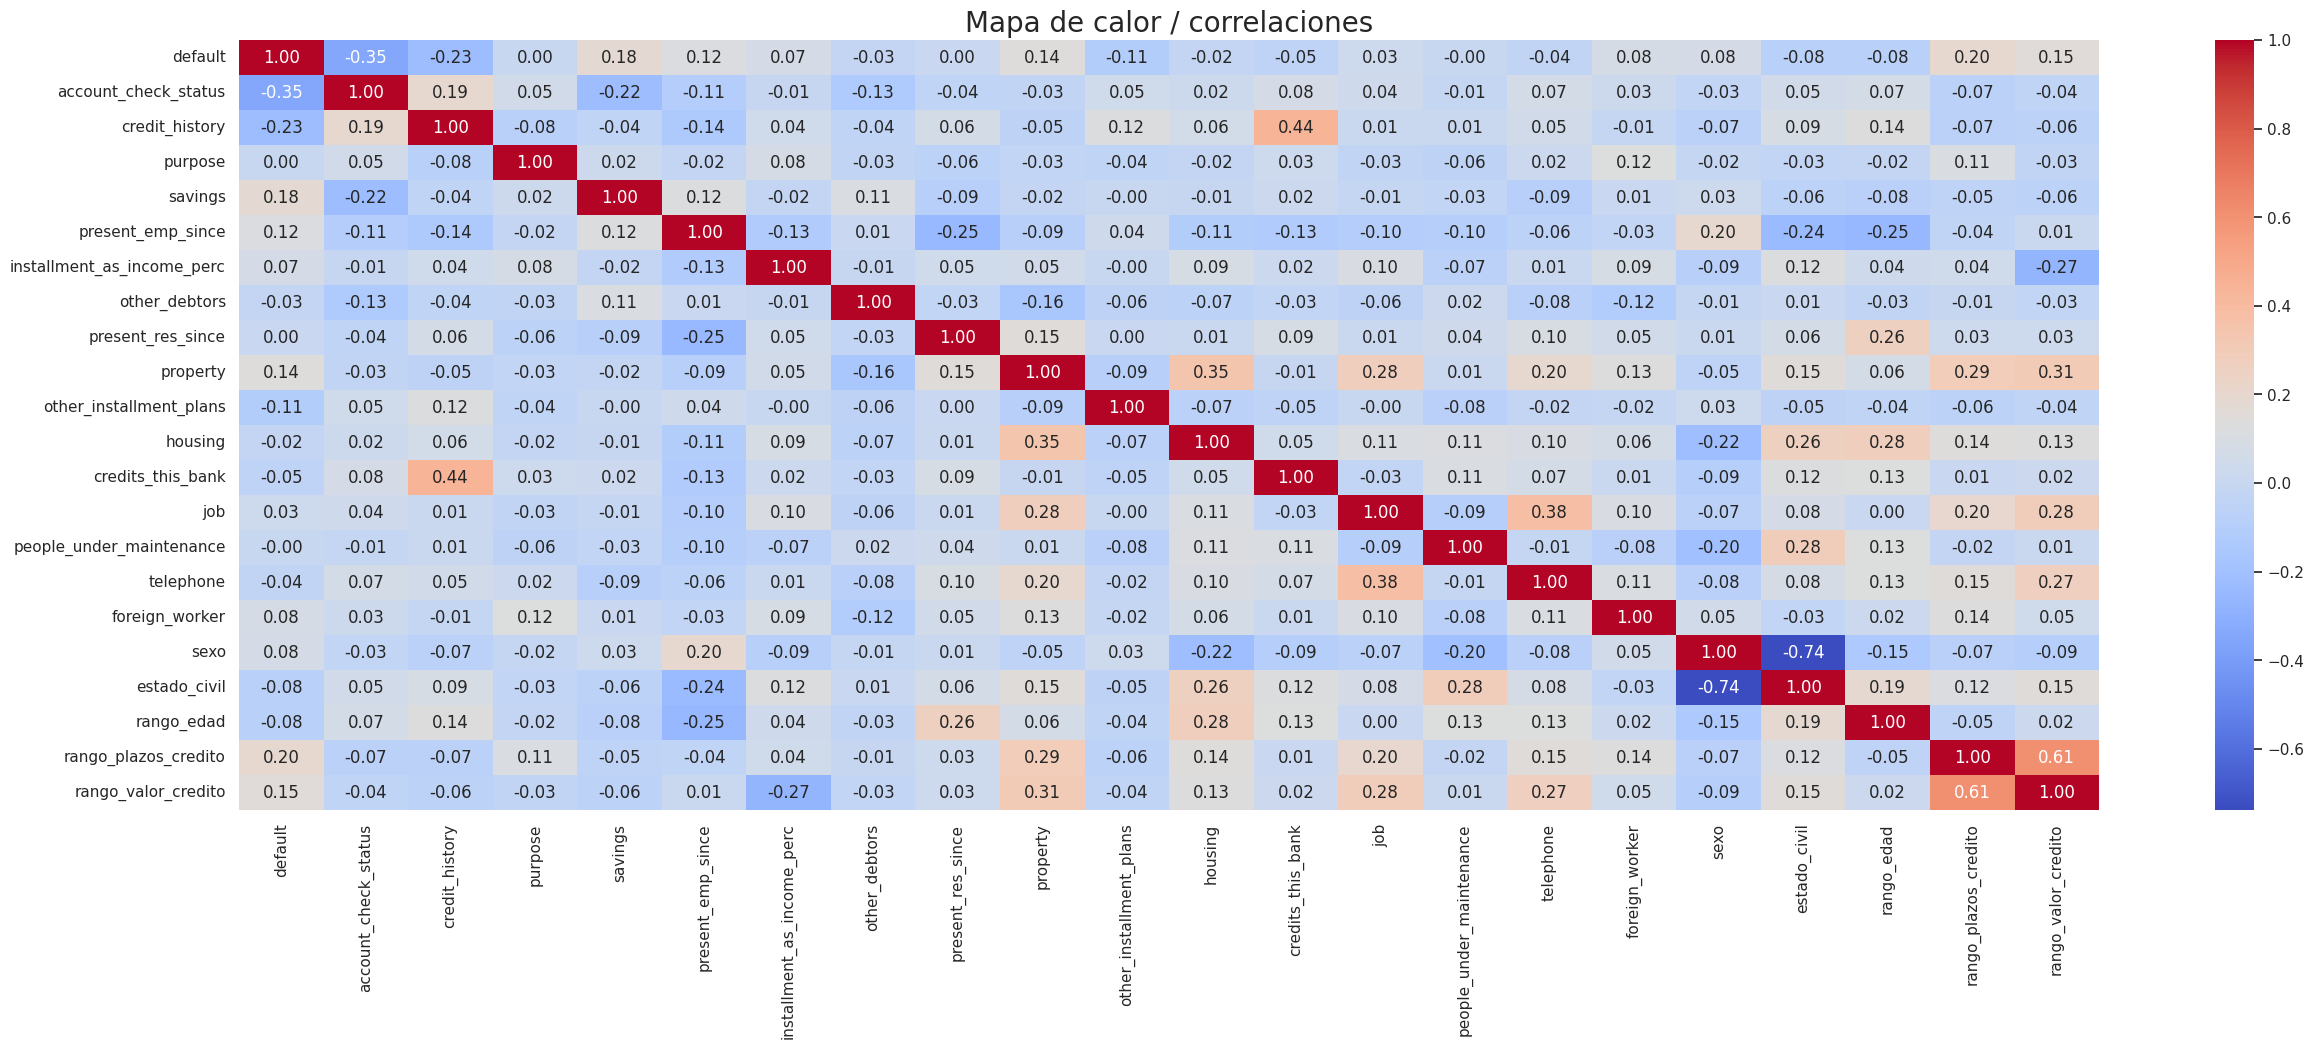

In [ ]:
plt.figure(figsize=(30,10))
# creamos una figura de 30x10

heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# creamos un heatmap, usando la funcion de correlacion, con anotaciones verdaderas (estos son los numeros dentro del cuadro) y con un color llendo de (frio a caliente), despues marcamos que quqeremos solo 2 decimales

plt.title('Mapa de calor / correlaciones', fontsize=20)

plt.show()



## Guardar el CSV limpio


In [ ]:
# prompt: i need to save the new dataframe into a csv in drive

df_banco.to_csv('/content/Drive/MyDrive/inmersion/resources/german_credit_clean.csv', index=False)
